In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [2]:
df_train=pd.read_csv('train_loan.csv')
df_test=pd.read_csv('test_loan.csv')

In [3]:
train=df_train.copy()
test=df_test.copy()

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [6]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
def missing_values(df):
    #Missing Values in dataframe
    mis_val = df.isnull().sum()
    #Missing value Percent :
    mis_val_percent = 100* df.isnull().sum() / len(df)
    #Missing Values Table
    mis_val_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mis_val_ren=mis_val_table.rename(columns={0:'Missing Values',1:'Percentage missing'})
    mis_val_final=mis_val_ren.sort_values('Percentage missing',ascending=False)
    
    return mis_val_final


In [8]:
missing_values(df_train)

,Missing Values,Percentage missing
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [9]:
missing_values(df_test)

,Missing Values,Percentage missing
Credit_History,29,7.901907
Self_Employed,23,6.267030
Gender,11,2.997275
Dependents,10,2.724796
Loan_Amount_Term,6,1.634877
LoanAmount,5,1.362398
Loan_ID,0,0.000000
Married,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [10]:
df_train.shape,df_test.shape

((614, 13), (367, 12))

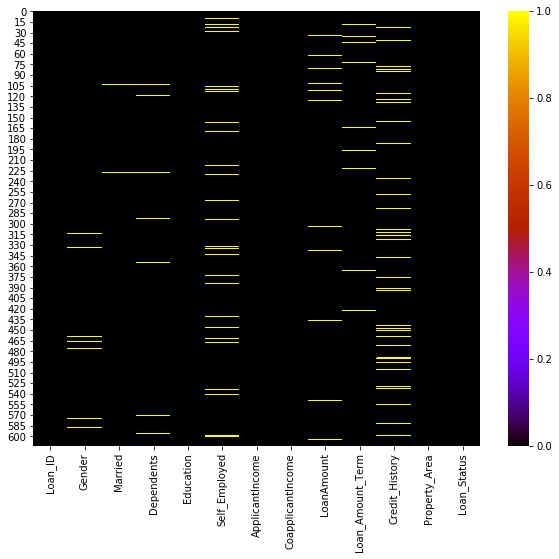

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df_train.isna(),cmap='gnuplot')

In [12]:
df_train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [13]:
#First Let us look at the ditribution of target variable 
df_train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

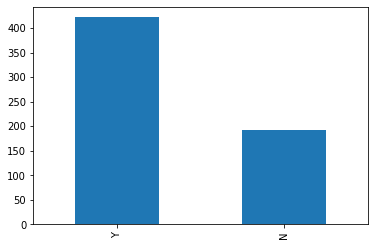

In [14]:
df_train['Loan_Status'].value_counts().plot.bar()

Categorical features - These features have categories. Eg: Gender , Married, Self Employed, Marital status, Credit history
Ordinal Features - Variables in categorical Features having some order involved. Eg: Dependents , Education, Property Area

Numerical fearures have numerical values


In [15]:
#Let's drop the Loan_ID column.Its of no use to us 
df_train.drop('Loan_ID',axis=1,inplace=True)

In [16]:
categorical_columns = [x for x in df_train.dtypes.index if df_train.dtypes[x]=='object']

In [17]:
categorical_columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [18]:
numerical_columns = [x for x in df_train.dtypes.index if df_train.dtypes[x]!='object']

In [19]:
numerical_columns

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [20]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Univariate Analysis

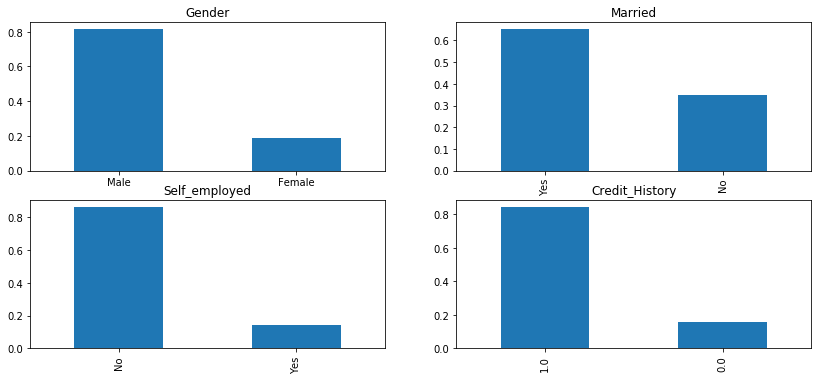

In [21]:
plt.figure(1)
plt.subplot(221)
df_train['Gender'].value_counts(normalize=True).plot.bar(figsize=(14,6),title='Gender')
plt.xticks(rotation=360)
plt.subplot(222)
df_train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
df_train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_employed')
plt.subplot(224)
df_train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

80% of Applicants are Male

Around 65% are Married

15% are self Employed

85% have repaid their debts

In [22]:
#Ordinal Values analysis 


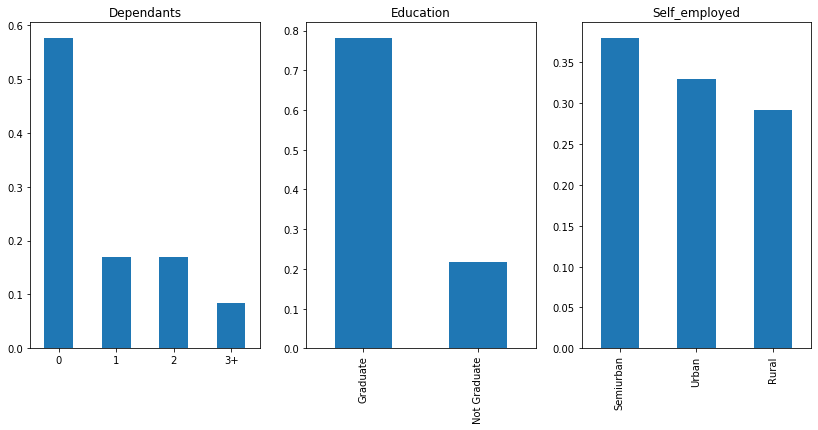

In [23]:
plt.figure(1)
plt.subplot(131)
df_train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(14,6),title='Dependants')
plt.xticks(rotation=360)
plt.subplot(132)
df_train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
df_train['Property_Area'].value_counts(normalize=True).plot.bar(title='Self_employed')
plt.show()

Most of them don't hve dependents
Around 80% are graduates
Comparitively semi urban people are more

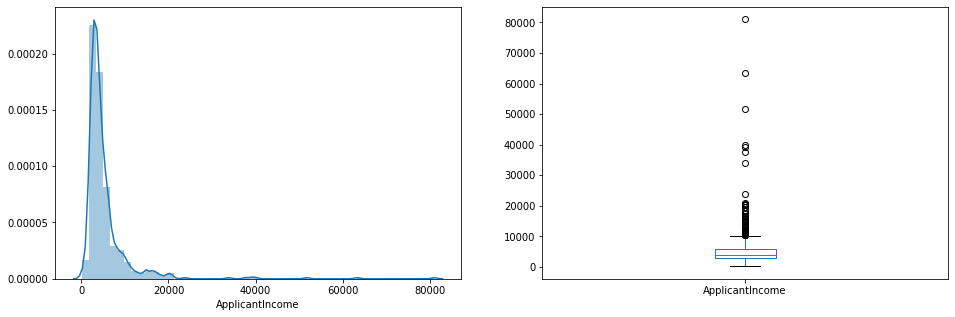

In [24]:
#Numerical Features distribution
#Let's look at the distribution of ApplicantIncome
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train['ApplicantIncome'])
plt.subplot(122)
df_train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

The distribution is towards left. There are lot of outliers in income distribution. It may be because of income disparity in the society. Partly because we may consider prople with differnt education evel. So let us consider according to education

C:\Users\91999\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 0.98, '')

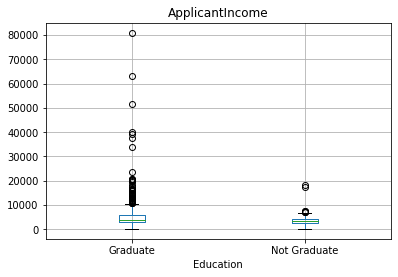

In [25]:
df_train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

There are higher number of graduates with higher income which maybe outliers

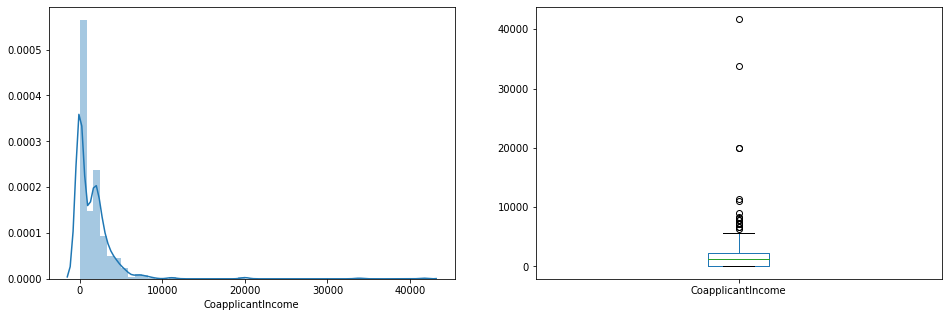

In [26]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train['CoapplicantIncome'])
plt.subplot(122)
df_train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

The distribution of co applicant income is similar to that of Applicant income and it has outliers as well

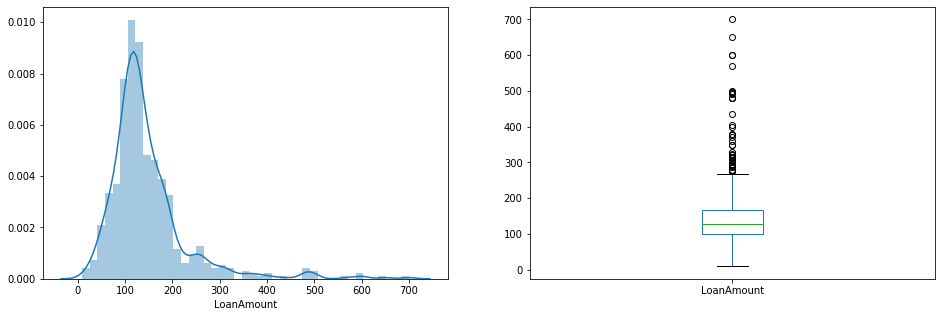

In [27]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df_train['LoanAmount'])
plt.subplot(122)
df_train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

Loan Amount distribution is fairly normal but there are lot of outliers

## Bivariate Analysis

In [28]:
#THough credit history has numerical values. It has only 2 values .So lets consider it as categorical. Lets consider Loan_Amount_Term as well
categorical = ['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Credit_History',
 'Loan_Amount_Term']

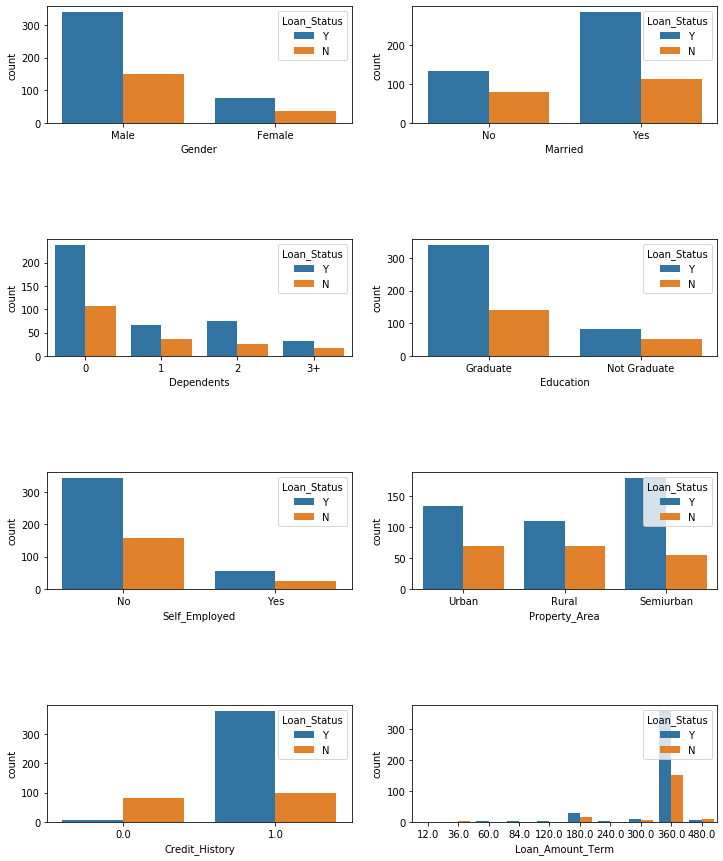

In [29]:
fig,axes=plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical):
    row,col=idx//2,idx%2
    sns.countplot(x=cat_col,data=df_train,hue='Loan_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)


Plots above convey following things about the dataset:

1) Loan Approval Status: About 2/3rd of applicants have been granted loan.

2) Sex: There are more Men than Women (approx. 3x

3) Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.

4) Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.

5) Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval

6) Employment: 5/6th of population is not self employed.

7) Property Area: More applicants from Semi-urban and also likely to be granted loans.

8) Applicant with credit history are far more likely to be accepted.

9) Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).


Now, let's also analyze Numerical Columns:



In [30]:
numerical = ['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount']

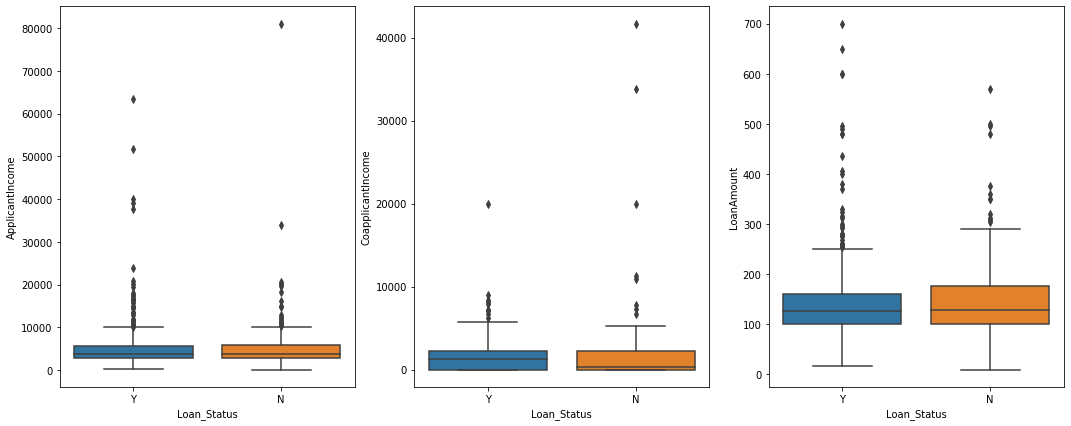

In [31]:
fig,axes=plt.subplots(1,3,figsize=(18,7))
for idx,num_col in enumerate(numerical):
    sns.boxplot(y=num_col,data=df_train,x='Loan_Status',ax=axes[idx])
plt.subplots_adjust(hspace=1)


Now lets create stacked bar plots to understand find the proportion of approved and not approved loans based on different categories

In [32]:
gender=pd.crosstab(df_train['Gender'],df_train['Loan_Status'])
gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [33]:
gender.div(gender.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


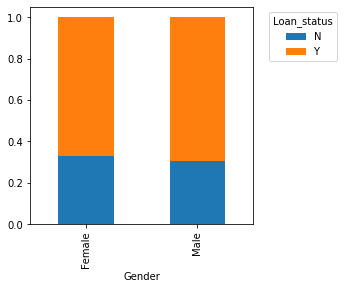

In [34]:
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(bbox_to_anchor=(1.05, 1),title='Loan_status')

It can be inferred that the proportion of male and female getting loan approved is almost same

In [35]:
married=pd.crosstab(df_train['Married'],df_train['Loan_Status'])
dep=pd.crosstab(df_train['Dependents'],df_train['Loan_Status'])
edu=pd.crosstab(df_train['Education'],df_train['Loan_Status'])
selfemp=pd.crosstab(df_train['Self_Employed'],df_train['Loan_Status'])

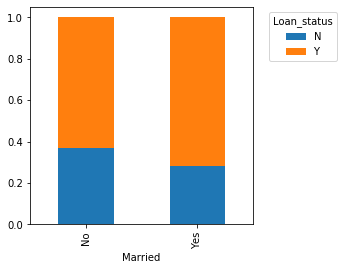

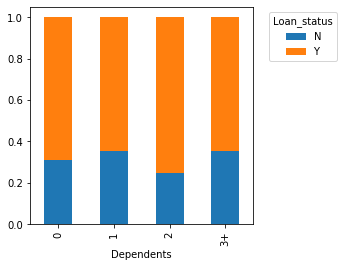

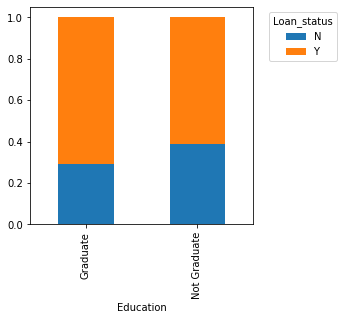

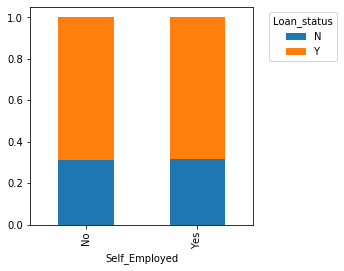

In [36]:
married.div(married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(bbox_to_anchor=(1.05, 1),title='Loan_status')
dep.div(dep.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(bbox_to_anchor=(1.05, 1),title='Loan_status')
edu.div(edu.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(bbox_to_anchor=(1.05, 1),title='Loan_status')
selfemp.div(selfemp.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(bbox_to_anchor=(1.05, 1),title='Loan_status')

Proportion of married aplicants and graduates is higher for approved loans


In [37]:
credit=pd.crosstab(df_train['Credit_History'],df_train['Loan_Status'])
property=pd.crosstab(df_train['Property_Area'],df_train['Loan_Status'])


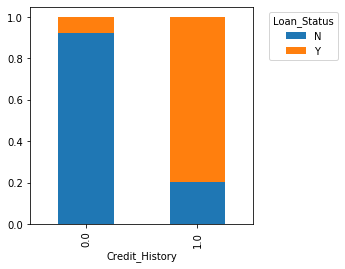

In [38]:
credit.div(credit.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(bbox_to_anchor=(1.05,1),title='Loan_Status')

Persona who have credit History as 1 are more likely to get loan approved

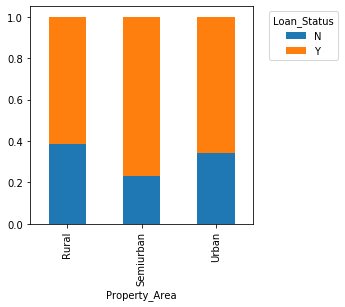

In [39]:
property.div(property.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(bbox_to_anchor=(1.05,1),title='Loan_Status')

Proportion of loans getting approved in semi urban area is higher

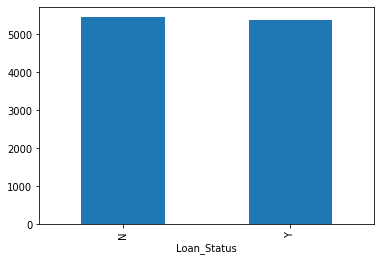

In [40]:
#Numerical vs Target variable
#Let us find the mean income of people for which loan has been approved and not approved
df_train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

We don't see any change in mean income so lets make bins for Applicant Income based on values in it and analyze the corresponding loan status for each bins. Lets see the featuers and make bins accordingly

In [41]:
df_train[numerical].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


In [42]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High','Very High']
df_train['Income_bin']=pd.cut(df_train['ApplicantIncome'],bins,labels=group)

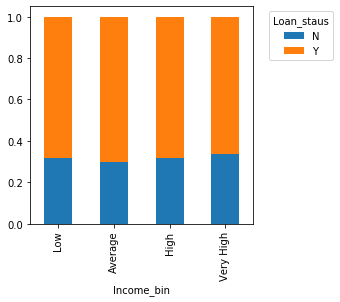

In [43]:
income_bin=pd.crosstab(df_train['Income_bin'],df_train['Loan_Status'])
income_bin.div(income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(bbox_to_anchor=(1.05,1),title='Loan_staus')

As per above chart we could see that Applicant income does not have much effect on loan approval which contradicts our assumption that high income people will easily get loan

In [44]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
df_train['CoIncome_bin']=pd.cut(df_train['CoapplicantIncome'],bins,labels=group)

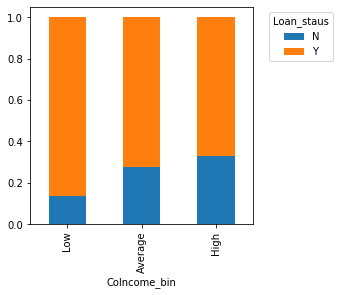

In [45]:
coincome_bin=pd.crosstab(df_train['CoIncome_bin'],df_train['Loan_Status'])
coincome_bin.div(coincome_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(bbox_to_anchor=(1.05,1),title='Loan_staus')

It shows that if CoApplicant income is less then the chances of Loan Approval is high which contradicts. The possible reason maybe most of them don't have coAppplicant and hece the value is zero.So Loan approval is not dependent on it.So lets create a new variable total inicome by combing Applicant and Coapplicant income and see the net effect"

In [46]:
df_train['Total_income']=df_train['ApplicantIncome']+df_train['CoapplicantIncome']

In [47]:
df_train['Total_income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_income, dtype: float64

In [48]:
bins=[0,3000,5400,7500,81000]
group=['Low','Average','High','VeryHigh']

In [49]:
df_train['TotIncome_bin']=pd.cut(df_train['Total_income'],bins,labels=group)

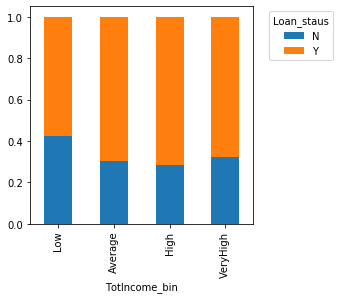

In [50]:
totincome_bin=pd.crosstab(df_train['TotIncome_bin'],df_train['Loan_Status'])
totincome_bin.div(totincome_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(bbox_to_anchor=(1.05,1),title='Loan_staus')

Prorportion of loans getting approved for low income is very less

In [51]:
#Lets visualize loan amount variable
bins=[0,100,200,700]
group=['Low','Average','High']
df_train['LoanAmount_bin']=pd.cut(df_train['LoanAmount'],bins,labels=group)

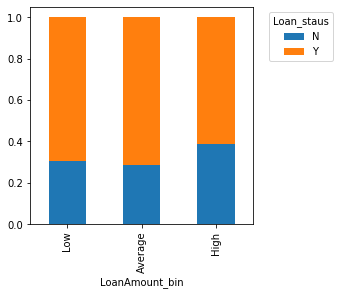

In [52]:
LoanAmount_bin=pd.crosstab(df_train['LoanAmount_bin'],df_train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.legend(bbox_to_anchor=(1.05,1),title='Loan_staus')

The possibility of loan getting approved for Low and average level loan amounts is higher

Now lets drop the bin variables which we created for exploration part and also we change the 3+ dependents to 3 to make it numeric. 

In [53]:
df_train=df_train.drop(['Income_bin','CoIncome_bin','Total_income','TotIncome_bin','LoanAmount_bin'],axis=1)

In [54]:
df_train['Dependents'].replace('3+',3,inplace=True)
df_test['Dependents'].replace('3+',3,inplace=True)
df_train['Loan_Status'].replace('N',0,inplace=True)
df_train['Loan_Status'].replace('Y',1,inplace=True)

Now lets look at the correlation between all numeric variables through a heatmap


In [55]:
corr=df_train.corr()

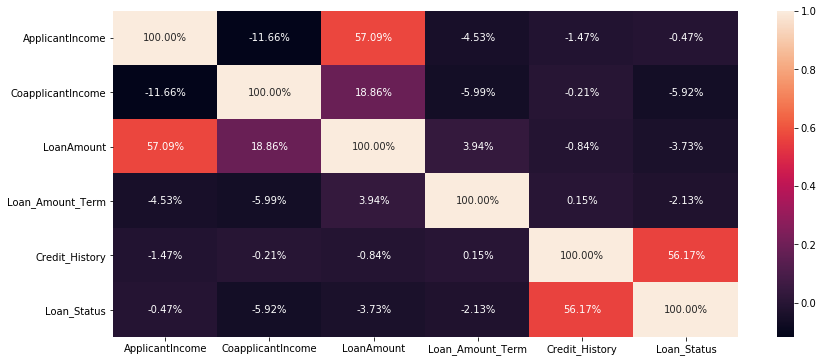

In [56]:
plt.figure(figsize=(14,6))
sns.heatmap(corr,annot=True,fmt='.2%')

In [57]:
corr['Loan_Status']

ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.037318
Loan_Amount_Term    -0.021268
Credit_History       0.561678
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

We can see that the most correlated features are (ApplicantIncome-LoanAmount) and (LoanStatus-Credit_History)

## Missing Value Imputation
__Numerial variables__ - mean or median
__Categorical variables__ - mode

In [58]:
df_train['Gender']=df_train['Gender'].fillna(df_train['Gender'].mode()[0])
df_train['Married']=df_train['Married'].fillna(df_train['Married'].mode()[0])
df_train['Dependents']=df_train['Dependents'].fillna(df_train['Dependents'].mode()[0])
df_train['Self_Employed']=df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0])
df_train['Credit_History']=df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0])

In [59]:
df_test['Gender']=df_test['Gender'].fillna(df_test['Gender'].mode()[0])
df_test['Dependents']=df_test['Dependents'].fillna(df_test['Dependents'].mode()[0])
df_test['Self_Employed']=df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0])
df_test['Credit_History']=df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0])

In [60]:
df_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Here the value of 360 is repeating the most. So we shall fill this with the mode 

In [61]:
df_train['Loan_Amount_Term']=df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0])
df_test['Loan_Amount_Term']=df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0])

As Loan Amount has lot of outliers let fill it with median as mean will be affected by the presence of outliers 

In [62]:
df_train['LoanAmount']=df_train['LoanAmount'].fillna(df_train['LoanAmount'].median())

In [63]:
df_test['LoanAmount']=df_test['LoanAmount'].fillna(df_test['LoanAmount'].median())

### Outlier Treatment

Due to outliers we have either right or left skew in numerical variables . We can remove it by taking log transformation 

In [64]:
df_train['ApplicantIncome']=np.log1p(df_train['ApplicantIncome'])
df_train['CoapplicantIncome']=np.log1p(df_train['CoapplicantIncome'])


In [65]:
df_test['ApplicantIncome']=np.log1p(df_test['ApplicantIncome'])
df_test['CoapplicantIncome']=np.log1p(df_test['CoapplicantIncome'])


In [66]:
df_train['LoanAmount']=np.log1p(df_train['LoanAmount'])
df_test['LoanAmount']=np.log1p(df_test['LoanAmount'])


Note we can also create new features like total income and EMI like below
total income =Applicant income + coapplicant Income
EMI=Loan Amount/LoanAmount term
If we are creating these features then we have to delete original features Applicant Income,Aoappicant income,Loan Amount and Loan Amount term
We can also create new feature Balance Income = Total Income - (EMI* 1000) . MUltiplying by 1000 to make units equal

In [67]:

df_test=df_test.drop('Loan_ID',axis=1)

In [68]:
X=df_train.drop('Loan_Status',axis=1)
y=df_train['Loan_Status']

In [69]:
X=pd.get_dummies(X)

In [70]:
df_test=pd.get_dummies(df_test)

In [71]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
model=LogisticRegression()

In [76]:
model.fit(X_train,y_train)

C:\Users\91999\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
modpred=model.predict(X_test)

In [79]:
print(classification_report(modpred,y_test))

              precision    recall  f1-score   support

           0       0.42      0.93      0.57        29
           1       0.98      0.76      0.86       156

    accuracy                           0.78       185
   macro avg       0.70      0.84      0.71       185
weighted avg       0.89      0.78      0.81       185



In [80]:
accuracy_score(modpred,y_test)

0.7837837837837838

In [81]:
confusion_matrix(modpred,y_test)

array([[ 27,   2],
       [ 38, 118]], dtype=int64)

In [82]:
from sklearn.model_selection import StratifiedKFold

In [83]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    X_train,X_test=X.iloc[train_index],X.iloc[test_index]
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    lr=LogisticRegression(random_state=1)
    lr.fit(X_train,y_train)
    lrpred=lr.predict(X_test)
    score=accuracy_score(lrpred,y_test)
    print('Accuracy score', score)
    

C:\Users\91999\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\91999\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Accuracy score 0.8130081300813008
Accuracy score 0.8292682926829268


C:\Users\91999\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\91999\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Accuracy score 0.7967479674796748
Accuracy score 0.8048780487804879
Accuracy score 0.8032786885245902


C:\Users\91999\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [84]:
import lightgbm as lgb

In [85]:
lg=lgb.LGBMClassifier()
lg.fit(X_train,y_train)

LGBMClassifier()

In [86]:
lgpred=lg.predict(X_test)

In [87]:
accuracy_score(y_test,lgpred)

0.7131147540983607

In [88]:
from sklearn.ensemble import VotingClassifier


In [89]:
finmodel=VotingClassifier(estimators=[('lf', lg), ('rf', lr)], voting='hard',weights=(2,1))


In [90]:
finmodel.fit(X_train,y_train)

C:\Users\91999\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


VotingClassifier(estimators=[('lf', LGBMClassifier()),
                             ('rf', LogisticRegression(random_state=1))],
                 weights=(2, 1))

In [91]:
pred=finmodel.predict(X_test)

In [92]:
accuracy_score(y_test,pred)

0.7131147540983607